# **# MVP Análise de Dados e Boas Práticas (40530010055_20240_01)**



**NAME:** Andre Ferreira do Nascimento

**DATA:** Set/2024

# **CONTEXT**

For the Data Analysis MVP I will work with a food retail dataset. I choose this data because, aside from being open sourced, it was supposedly used in startup selection processes before. Therefore, I think it is a good way to test knowledge in a format that it's applicable within a real live tech company context.

This set is a hypothetical data from a marketing campaign of a store that sells wines, meat products, fish products, fruits and sweets through catalogues, physical stores and through a website. Products can be classified as 'gold' or 'regular' products. The dataset was collected directly with ramdom costumer through phone calls. It contais the following variables:

*   **"ID":** "Unique survey respondent identifier";
*   **"Year_Birth":** "Year the respondent was born in";
*   **"Education":** "Education level of the respondent";
*   **"Marital_Status":** "Marital status from the survey respondent";
*   **"Income":** "Annual income of the respondent's household";
*   **"Kidhome":** "Number of children in the respondent's household";
*   **"Teenhome":** "Number of teenagers in the respondent's household";
*   **"Dt_Customer":** "Date the respondent was first registered in the company database";
*   **"Recency":** "Number of days since the respondent's last purchase";
*   **"MntWines":** "Amount the respondent spent on wine in the last 2 years";
*   **"MntFruits":** "Amount the respondent spent on fruits in the last 2 years";
*   **"MntMeatProducts":** "Amount the respondent spent on meat in the last 2 years";
*   **"MntFishProducts":** "Amount the respondent spent on fish in the last 2 years";
*   **"MntSweetProducts":** "Amount the respondent spent on sweets in the last 2 years";
*   **"MntGoldProds":** "Amount the respondent spent on gold in the last 2 years";
*   **"NumDealsPurchases":** "Number of purchases respondent made with a discount";
*   **"NumWebPurchases":** "Number of purchases the respondent made through the company website";
*   **"NumCatalogPurchases":** "Number of purchases the respondent made using a catalogue";
*   **"NumStorePurchases":** "Number of purchases the respondent made directly in stores";
*   **"NumWebVisitsMonth":** "Number of times the respondent visited the company website in the last month";
*   **"AcceptedCmp1":** "1 if the respondent accepted the offer in the 1st campaign, 0 otherwise"
*   **"AcceptedCmp2":** "1 if the respondent accepted the offer in the 2nd campaign, 0 otherwise"
*   **"AcceptedCmp3":** "1 if the respondent accepted the offer in the 3rd campaign, 0 otherwise"
*   **"AcceptedCmp4":** "1 if the respondent accepted the offer in the 4th campaign, 0 otherwise"
*   **"AcceptedCmp5":** "1 if the respondent accepted the offer in the 5th campaign, 0 otherwise"
*   **"Response":** "1 if customer accepted the offer in the last campaign, 0 otherwise"
*   **"Complain":** "If the respondent complained in the last 2 years"

With this working dataset, I will (1) **Define a problem** to tackle, (2) make an initial **exploratory data analysis**, (3) **pre-process the data and make a final analysis** to answer the questions definied in the problem definition phase.

# **(1) DEFINING THE PROBLEM**

I will look at the data and try to answer the following question:



---



*   **For the given context, what is the profile of customers that are easily converted through market campaigns, which ones are harder to convince and which ones are not reachable at all?**



---




I will not built a machine learning model here, since its not the focus of this class module. But I will acknowledge that **the data could be used to build a unsurpervised model, by telling it to select variables and suggest the clusters that are more susceptible to marketing campaigns; or supervised models, pre-selecting the features that one wants to study and then feeding them to the model in way that it predicts what type a customer belongs to**. In this MVP, I will pre-select features based on the phase (2) "exploratory data analysis".

**I have some hypotheses that I want to study. I will list the main ones below:**

**a)** Income affects customer susceptibility to marketing campaigns, but in a lower level of importance than the customer spending profile. If the customer is used to spend a lot with food purchases, regardless of his wealth, he is willing to spend more if pushed to do so.

**b)** Clients with high recency are not the most susceptible to marketing campaigns because they already buy things recurrently, in a pre-planned schedule. Even when they have the will to spend, they just don't need extra products.

**c)** The higher the educational of the customer the less he/she is affected by marketing, since he/she should have more clear judgment, and is more oriented by reason instead of emotion.

**d)** If a customer is married and have children (kids or teenagers) he/she will be more susceptible to market campaigns, since his/her holsehould consumption is higher when compared to single people. Also, he/she is less likely to eat out and thus more willing to stock food ast home.

**If these hypotheses are sound, a customer would be highly susceptible to marketing campaigns if he/she (a) spends a lot in itens, (b) has lower recency, (c) lower education levels, and (d) has children.**

**These are my main hypotheses, but I subsidiary analyses can also become relevant after the initial exploratory analysis**. Maybe customer complaints do not affect their reaction to marketing, but maybe they do. Maybe people that buy wine are more susceptible to marketing than ones who do not. I will look at basic statistics measures and decide if these are paths worth pursuing.

It is worth noticing that this **dataset is restricted to the available data, which is compose by 2240 records**. Despite the fact that customers responses were random, **we cannot determine if the findings will turn out to be biased due to the selected sampling, I will just assume the sampling method was fair enough to filter out this type of problem**.

**All the dataset attributes were defined in the previous section (CONTEXT)**.

In [ ]:
# Before starting the next sections, I will import the modules we will need for the analyses and the pre-processing.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **(2) EXPLORATORY DATA ANALYSIS**



In [ ]:
# To start, I will  the data base from the public GitHub link I placed it.
# There's a lot of columns in the dataset, I will opt to show them all. We will check if the code was successful by display some rows.

df = pd.read_csv('https://raw.githubusercontent.com/andre-f-nascimento/PUC-Minas/main/Retail_Food_Campaign.csv')
pd.set_option('display.max_columns', None)
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,1,0
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,0,0,1,0,0,0,0


In [ ]:
# To get a general idea of the database, we will check  the number of rows, and the max, min and mean values of the numeric columns.
# We will also check for null values and look further into categorical columns in order to make sure all their possible values make sense. If not, I will signalize that we will need to treat them in the pre-pocessing phase.
# We will check for a potential incosistency in the data: if the customer accepted the offer in a early campaign stage, there should be no records that show that the same customer accepted the campaing in a later stage. This can't be true unless a customer can adhere to a campaing multiple times. Since this seems unlikely, I will choose to interpret these cases as a dataset incosistency.
# Then I will see if the variables have strong correlations with each other. This can show us if the hypothesis we suggested in the problem definition are worth pursuing and elucidate new ones we should look at.

# Let's get started.

In [ ]:
df.shape # The set has 2240 rows, was expected.

(2240, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

# We can see that:
## The min value for Year_Birth seems too low. I will examine this further. Other numeric values seem fine.
## Wines and meats are the type of products that have big spenders. Maybe customers that buy these products are more open to spend more when they receive market offers.
## The disparity of customer income is huge, ranging from $ 1730 to over $ 600k. So, there are probably both poor and rich customers affected by the campaign. Even if income is relevent to predict the adhence to the marketing campaigns, it is most likely that there are other factors associated with income that need to be taken into consideration.
## Sales are more prevalent through the catalogue and the website, stores play only a minor roll. If a new marketing campaign should take place the channel selection should take this into consideration.
## There are customers that have been inactive for a long time. More than 50% of the database did not buy anything in the last month (the 50% percentile is 49 days). Maybe they are less likely to respond to market campaings. We will look at recency is highly correletad with people that do not buy in marketing campaings at the end of this section.

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[df["Income"].isnull()] # Only the 'Income' column has null records, and there's only 24 of them. Since we will need the income information to examine our hyphoteses we will remove then from our sample later on.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [ ]:
print(df['Year_Birth'].unique()) # There are respondents that were born before 1940, which seems unlikely. We will examine this further.
print(df['Education'].unique()) # There are values called 'Master' and '2nd Cycle' in this column. They should be the same.
print(df['Marital_Status'].unique()) # In Marital_Status we neeed to get rid of rows with the records 'Absurd' and 'YOLO' and change rows with 'Alone' to 'Single'.
print(df["Dt_Customer"].str[:4].unique()) # All customer seem to have been enrolled between 2012 and 2014, which appears to be fine.


[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['2012' '2014' '2013']


In [ ]:
df[df['Year_Birth'] < 1940]  # Examining Year_Birth further, we can see that there are only 3 respondents that were born before 1940. We will remove these records later.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,0,0,1,0,0


In [ ]:
# I will check for inconsistencies in the campaign acceptance columns. If the sum is over 1, the customer accepted the campaign more than once.
# In this case we will consider only the first time he/she accepted the campaign.

df[df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response'] > 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,1,0,0,0,1,1,0
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,0,0,1,0,0,1,0
53,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,54,510,120,550,156,40,241,1,4,9,7,1,1,0,1,0,0,1,0
55,6260,1955,Master,Together,82384.0,0,0,2012-11-19,55,984,51,432,180,120,190,1,3,10,13,1,0,0,0,0,1,1,0
60,6853,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,26,538,69,13,80,1,3,6,11,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1772,1975,PhD,Married,79174.0,0,0,2013-01-11,2,1074,37,518,193,92,129,1,5,6,7,2,1,0,0,0,1,1,0
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,54,845,202,133,63,1,7,7,10,3,1,0,1,0,0,1,0
2194,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,80,363,52,26,174,2,9,5,6,6,0,0,1,0,0,1,0
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,0,38,13,0,152,7,5,4,4,6,0,0,1,0,0,1,0


In [ ]:
# As we can see, there are 293 rows with this problem. I will treat this now, since it will be needed to support the rest of the exploratory data analysis.

import copy
# I imported the copy method because I was trying to alter a copy of the data fame and the code was altering both the copy and the original. To fix that, I created a deep copy with this module.
# I made this so I can still reference the original dataset, if needed.

df_updated = copy.deepcopy(df)
df_updated[df_updated['AcceptedCmp1'] + df_updated['AcceptedCmp2'] + df_updated['AcceptedCmp3'] + df_updated['AcceptedCmp4'] + df_updated['AcceptedCmp5'] + df_updated['Response'] > 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,1,0,0,0,1,1,0
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,0,0,1,0,0,1,0
53,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,54,510,120,550,156,40,241,1,4,9,7,1,1,0,1,0,0,1,0
55,6260,1955,Master,Together,82384.0,0,0,2012-11-19,55,984,51,432,180,120,190,1,3,10,13,1,0,0,0,0,1,1,0
60,6853,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,26,538,69,13,80,1,3,6,11,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1772,1975,PhD,Married,79174.0,0,0,2013-01-11,2,1074,37,518,193,92,129,1,5,6,7,2,1,0,0,0,1,1,0
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,54,845,202,133,63,1,7,7,10,3,1,0,1,0,0,1,0
2194,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,80,363,52,26,174,2,9,5,6,6,0,0,1,0,0,1,0
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,0,38,13,0,152,7,5,4,4,6,0,0,1,0,0,1,0


In [ ]:
# We will only register '1' in the earlier campaign the customer accepted the offer, and change the later ones to '0'.
# I will also check if the code worked as intended.

cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for i in range(len(cols)):
  for j in range(i+1, len(cols)):
    df_updated.loc[df_updated[cols[i]] == 1, cols[j]] = 0

df_updated[df_updated['AcceptedCmp1'] + df_updated['AcceptedCmp2'] + df_updated['AcceptedCmp3'] + df_updated['AcceptedCmp4'] + df_updated['AcceptedCmp5'] + df_updated['Response'] > 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain


In [ ]:
# We can see we correctly treated the incosistency.

df_updated.iloc[[15, 39]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,1,0,0,0,0,0,0
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,0,0,1,0,0,0,0


In [ ]:
# Before checking correlations within the dataset, we will create categorical columns to identify how the customer was affected by the marketing campaign.
# We will create 3 columns with the following names:
## Fast_Buyer: We will classify as fast buyers customers that accepted the marketing offer in 1st or 2nd campaign.
## Slow_Buyer: We will classify as slow buyers customers that accepeted the marketing offer in the 3rd, 4rt, 5th or last campaign ('Response' column).
## Not_Buyer: We will classify as not buyer customers that did not accepted the marketing offer at akk.

In [ ]:
df_updated["Fast_Buyer"] = np.where((df_updated["AcceptedCmp1"] == 1) | (df_updated["AcceptedCmp2"] == 1), 1, 0)
df_updated["Slow_Buyer"] = np.where((df_updated["AcceptedCmp3"] == 1) | (df_updated["AcceptedCmp4"] == 1) | (df_updated["AcceptedCmp5"] == 1) | (df_updated["Response"] == 1), 1, 0)
df_updated["Not_Buyer"] = np.where((df_updated["AcceptedCmp1"] == 0) & (df_updated["AcceptedCmp2"] == 0) & (df_updated["AcceptedCmp3"] == 0) & (df_updated["AcceptedCmp4"] == 0) & (df_updated["AcceptedCmp5"] == 0) & (df_updated["Response"] == 0), 1, 0)

In [ ]:
# I will check if there's any incosistency where a customer is present in more than one category.
# All seems fine.

df_updated[df_updated["Fast_Buyer"] + df_updated["Slow_Buyer"] + df_updated["Not_Buyer"] > 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Fast_Buyer,Slow_Buyer,Not_Buyer


<Axes: >

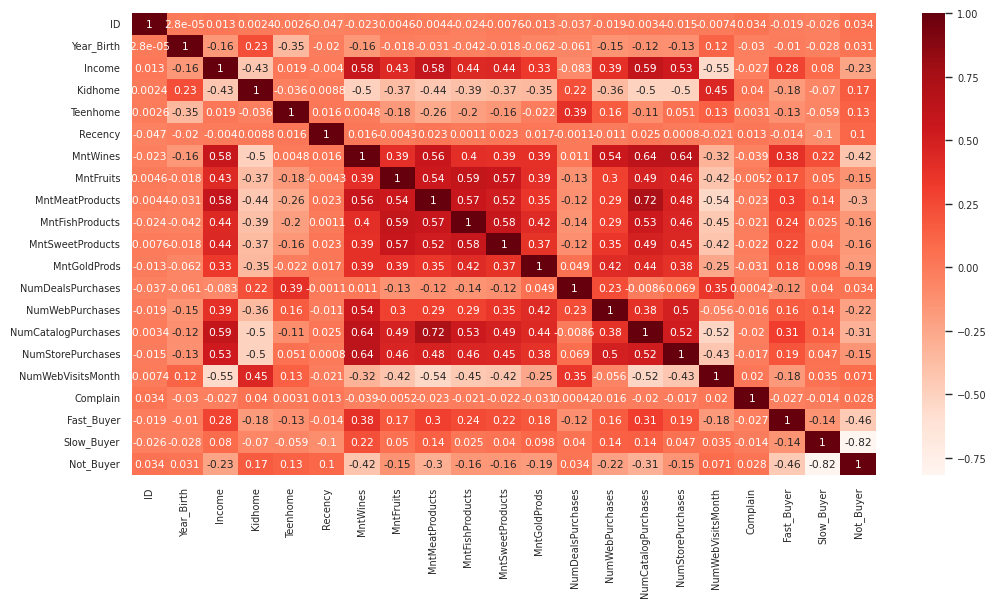

In [ ]:
# Now, we will create a matrix in which we can see the correlation among the variables. I will drop the ones I used to construct the categories Fast, Slow and No Buyer, since I will these new categories as a reference for the analysis, not the old ones.
# We will also set the figure size, the font size to make our matrix easier to interpret.
# We will plot this matrix into a heat, so the colors aid us to see patterns.

df_mx = df_updated.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1)
df_mx = df_mx.select_dtypes(include='number').corr()
plt.figure(figsize = (12,6))
sns.set_context('paper', font_scale = 0.8)
sns.heatmap(df_mx, annot = True, cmap = 'Reds') # annot is used to add annotations in the graph, we are also choosing the color red.

In [ ]:
# Recency was not as relevant as we expected.
# We can see that Fast Buyers have correlations to Income and spending patterns such as: number of purchases make through catalogs; and expenditure on Wine and Meat products, as we assumed would be the case.
# Fast Buyers also seem to be affected negatively by the presence of teens and kids at home.
# Slow Buyers have the same positive correlation pattern concerning wine spending, but they are less correclated to income and catalog pucharses. Also, they seem to be less negatively affected by children.
# Not Buyers seem to be negatively affected by income, and spending patterns, especially Wine Spending and number of Catalog Purchases.

# Based on the above analysis and categorical data that could not be computed in the heatmap (such as Marital_Status, Education, Dt_Customer), I decided that we will use the following features in the final analysis of the next sectiton:
## (1) Income
## (2) Year_Birth
## (3) Marital_Status
## (4) Education
## (5) Kidhome / (6) Teenhome - We can join these variables in a single column later to identify if a person has children.
## (7) Dt_Customer
## (8) MntWines
## (9) MntMeatProducts
## (10)NumCatalogPurchases

# **(3) DATA PRE-PROCESSING & FINAL ANALYSIS**

In [ ]:
# We will treat the data with the inputs we mapped on the exploratory data analysis.
# So, we will get rid of rows with NA in the income column, select only rows where the customers where born at 1940 onwards, adjust the Education column, remove rows with 'Absurd' and 'YOLO' Marital Status and change 'Alone' Marital Status to 'Single'.

df_updated = df_updated.dropna(subset=['Income'])
df_updated = df_updated[df_updated['Year_Birth'] >= 1940]
df_updated['Education'] = df_updated['Education'].replace('2n Cycle', 'Master')
df_updated = df_updated[~df_updated['Marital_Status'].isin(['Absurd', 'YOLO'])]
df_updated['Marital_Status'] = df_updated['Marital_Status'].replace('Alone', 'Single')

In [ ]:
# We will create categorical data based on some of the numeric columns of the selected features.
# So, we will calculate the quantiles for 'Income', 'Mnt_Wines' and 'Mnt_Meat_Products'.
# We will take 'Marital_Status', 'Education' and 'Num_Catalogs_Purchase' as they are now. We will change 'Dt_Customer_Year' to numeric and take it as is as well.
# We will change Year_Birth to numeric and divide it innto intervals of 20 years, creating ranges and fitting existing customers into them.
# We will join 'Kidhome' and 'Teenhome' in a single column that identifies if the customer has children.

# We made some calculations below, to use the quantiles.
# To ensure the bin edges are lower than the lowest value in the columns, I had to adjust the bins with -1 when the lowest value of the column was not 0.

income_quantiles = df_updated['Income'].quantile([0.25, 0.5, 0.75, 1]).astype(int) # Calculating the quantiles
income_min_value = df_updated['Income'].min() # Checking the minimum value of the lowest bin edge
income_bins = [income_min_value - 1 if income_min_value > 0 else 0] + income_quantiles.tolist() # Creating a list with the quantile values so I can iterate throught then and generate ranges (quantile1 - quantile2, quantile 2 - quantile 3 and so on), using minimum value - 1 as the first bin edge, if necessary.
income_labels = [f'${income_bins[i]} - ${income_bins[i+1]}' for i in range(len(income_bins)-1)] # Creating labels for classifying the data

mnt_wines_quantiles = df_updated['MntWines'].quantile([0.25, 0.5, 0.75, 1]).astype(int)
wines_min_value = df_updated['MntWines'].min()
mnt_wines_bins = [wines_min_value - 1 if wines_min_value > 0 else 0] + mnt_wines_quantiles.tolist()
mnt_wines_labels = [f'${mnt_wines_bins[i]} - ${mnt_wines_bins[i+1]}' for i in range(len(mnt_wines_bins)-1)]

mnt_meat_products_quantiles = df_updated['MntMeatProducts'].quantile([0.25, 0.5, 0.75, 1]).astype(int)
meat_min_value = df_updated['MntMeatProducts'].min()
mnt_meat_products_bins = [meat_min_value - 1 if meat_min_value > 0 else 0] + mnt_meat_products_quantiles.tolist()
mnt_meat_products_labels = [f'${mnt_meat_products_bins[i]} - ${mnt_meat_products_bins[i+1]}' for i in range(len(mnt_meat_products_bins)-1)]


df_updated['Income_Range'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, include_lowest=True)
df_updated['MntWines_Range'] = pd.cut(df_updated['MntWines'], bins=mnt_wines_bins, labels=mnt_wines_labels, include_lowest=True)
df_updated['MntMeatProducts_Range'] = pd.cut(df_updated['MntMeatProducts'], bins=mnt_meat_products_bins, labels=mnt_meat_products_labels, include_lowest=True)
df_updated['Year_Birth_Range'] = pd.cut(df['Year_Birth'], bins=range(1940, 2021, 20), labels=[f'{i}-{i+19}' for i in range(1940, 2001, 20)])
df_updated['Has_Children'] = ((df_updated['Kidhome'] == 1) | (df_updated['Teenhome'] == 1)).astype(int)
df_updated['Dt_Customer_Year'] = df_updated['Dt_Customer'].str[:4]
df_updated['Dt_Customer_Year'] = pd.to_numeric(df_updated['Dt_Customer_Year'])
df_updated.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Fast_Buyer,Slow_Buyer,Not_Buyer,Income_Range,MntWines_Range,MntMeatProducts_Range,Year_Birth_Range,Has_Children,Dt_Customer_Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0,0,1,0,$51373 - $68487,$505 - $1493,$232 - $1725,1940-1959,0,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,0,1,$35196 - $51373,$0 - $24,$0 - $16,1940-1959,1,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,0,1,$68487 - $666666,$174 - $505,$68 - $232,1960-1979,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,0,1,$1729.0 - $35196,$0 - $24,$16 - $68,1980-1999,1,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,0,1,$51373 - $68487,$24 - $174,$68 - $232,1980-1999,1,2014


In [ ]:
# I will check the result.
# All appears to be fine.

df_updated.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Fast_Buyer,Slow_Buyer,Not_Buyer,Income_Range,MntWines_Range,MntMeatProducts_Range,Year_Birth_Range,Has_Children,Dt_Customer_Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0,0,1,0,$51373 - $68487,$505 - $1493,$232 - $1725,1940-1959,0,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,0,1,$35196 - $51373,$0 - $24,$0 - $16,1940-1959,1,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,0,1,$68487 - $666666,$174 - $505,$68 - $232,1960-1979,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,0,1,$1729.0 - $35196,$0 - $24,$16 - $68,1980-1999,1,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,0,1,$51373 - $68487,$24 - $174,$68 - $232,1980-1999,1,2014


In [ ]:
# We will drop all the columns we will not use in our final analysis.
# For the analysis we are keeping the categorical ranges we created just now and letting go of the older versions.

df_analysis = df_updated.drop(['Year_Birth',
                               'Income',
                               'Kidhome',
                               'Teenhome',
                               'Dt_Customer',
                               'Recency',
                               'MntWines',
                               'MntFruits',
                               'MntMeatProducts',
                               'MntFishProducts',
                               'MntSweetProducts',
                               'MntGoldProds',
                               'NumDealsPurchases',
                               'NumWebPurchases',
                               'NumStorePurchases',
                               'NumWebVisitsMonth',
                               'AcceptedCmp1',
                               'AcceptedCmp2',
                               'AcceptedCmp3',
                               'AcceptedCmp4',
                               'AcceptedCmp5',
                               'Response',
                               'Complain'
                               ], axis=1)

In [ ]:
df_analysis.head(5)

,ID,Education,Marital_Status,NumCatalogPurchases,Fast_Buyer,Slow_Buyer,Not_Buyer,Income_Range,MntWines_Range,MntMeatProducts_Range,Year_Birth_Range,Has_Children,Dt_Customer_Year
0,5524,Graduation,Single,10,0,1,0,$51373 - $68487,$505 - $1493,$232 - $1725,1940-1959,0,2012
1,2174,Graduation,Single,1,0,0,1,$35196 - $51373,$0 - $24,$0 - $16,1940-1959,1,2014
2,4141,Graduation,Together,2,0,0,1,$68487 - $666666,$174 - $505,$68 - $232,1960-1979,0,2013
3,6182,Graduation,Together,0,0,0,1,$1729.0 - $35196,$0 - $24,$16 - $68,1980-1999,1,2014
4,5324,PhD,Married,3,0,0,1,$51373 - $68487,$24 - $174,$68 - $232,1980-1999,1,2014


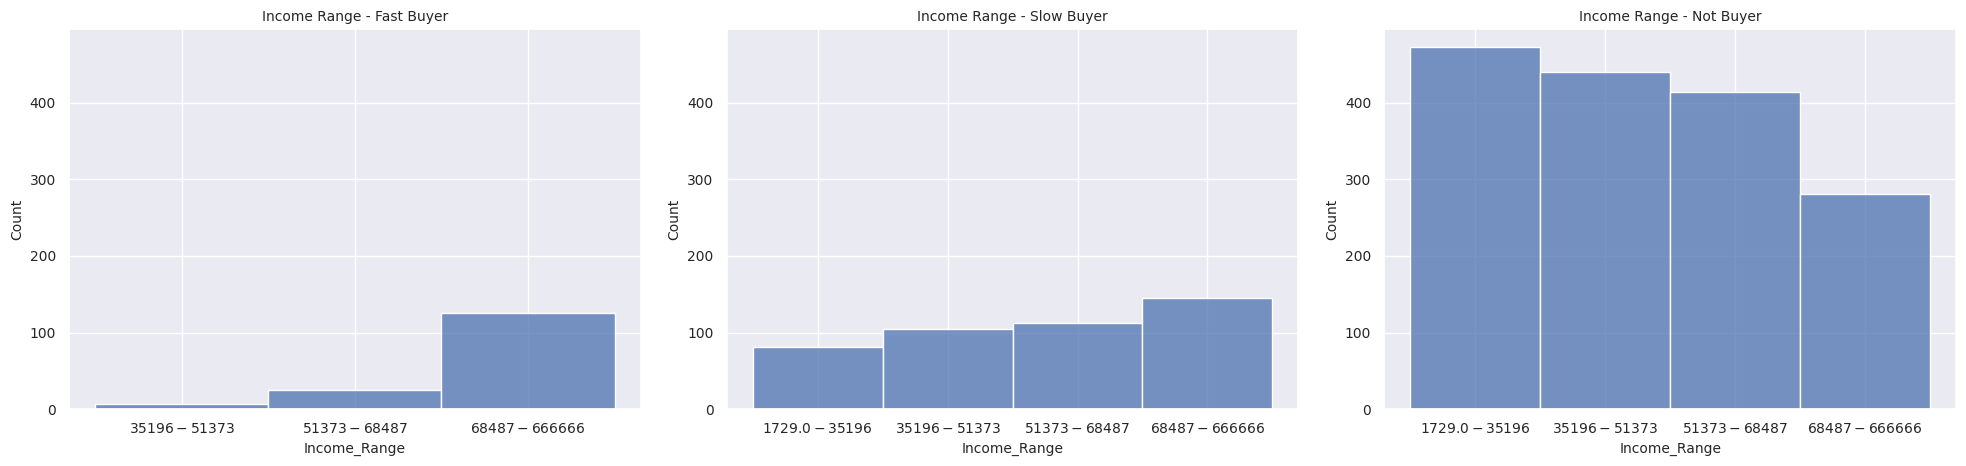

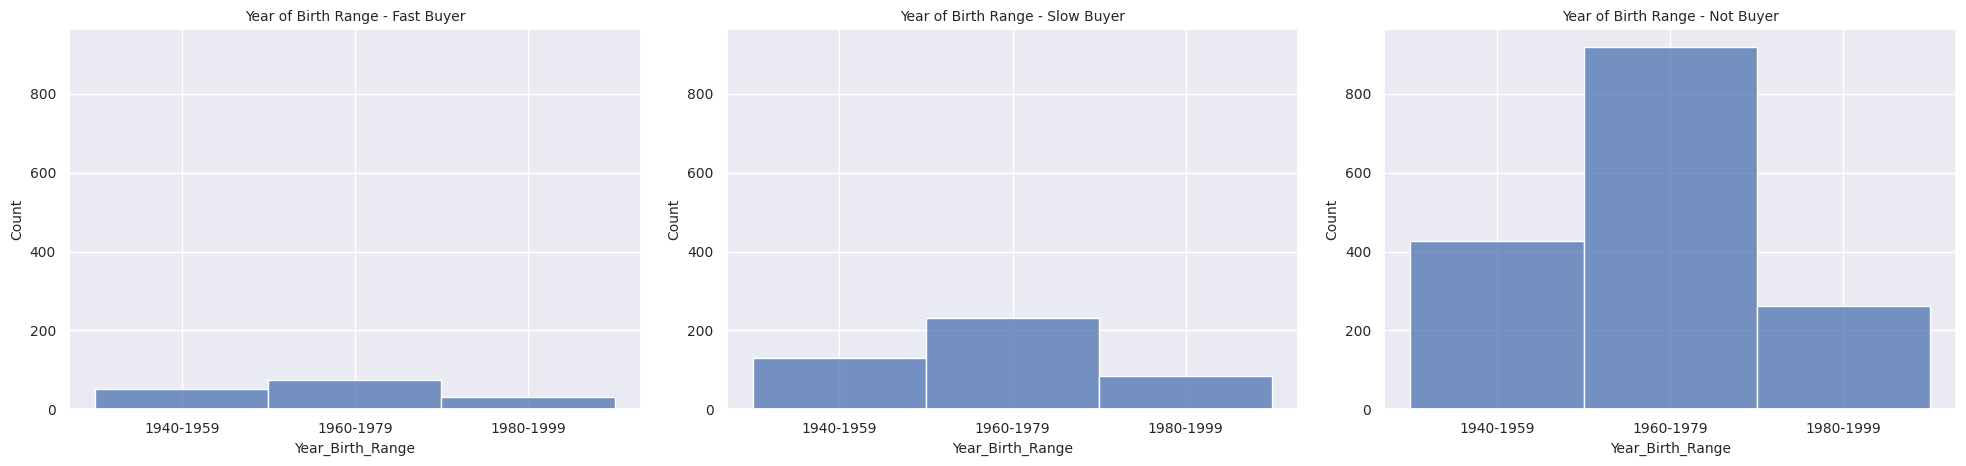

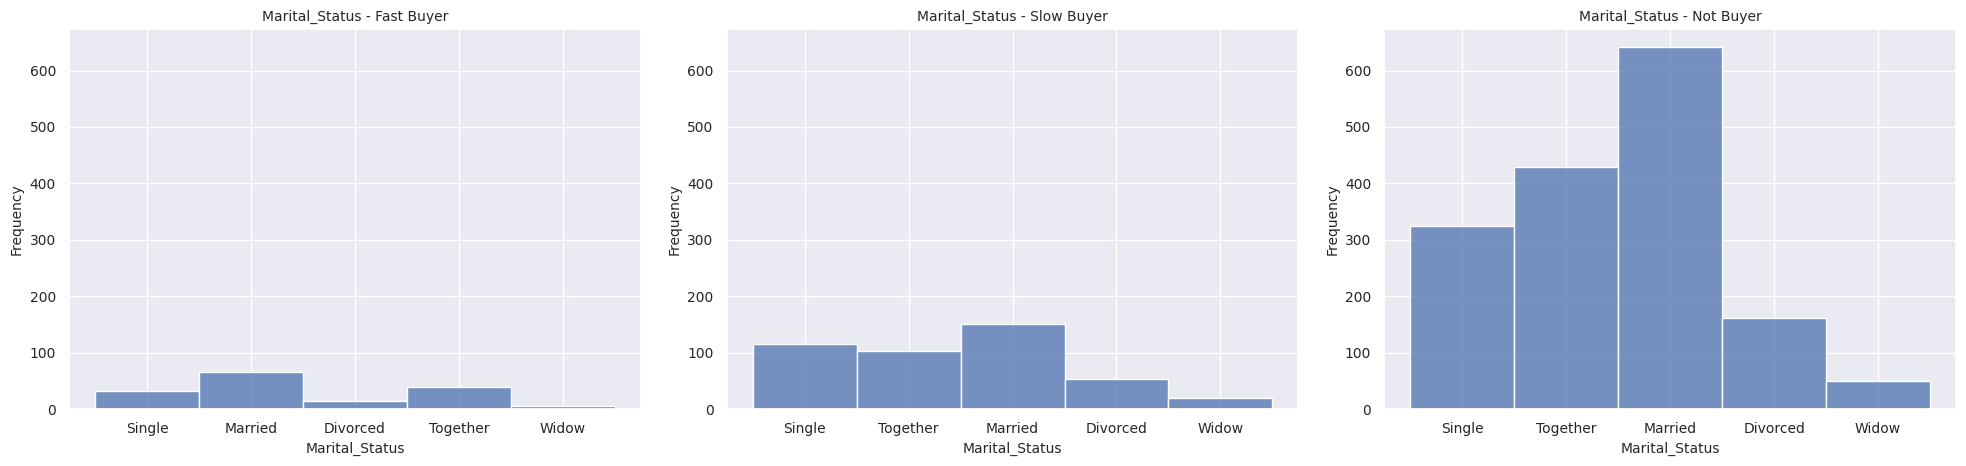

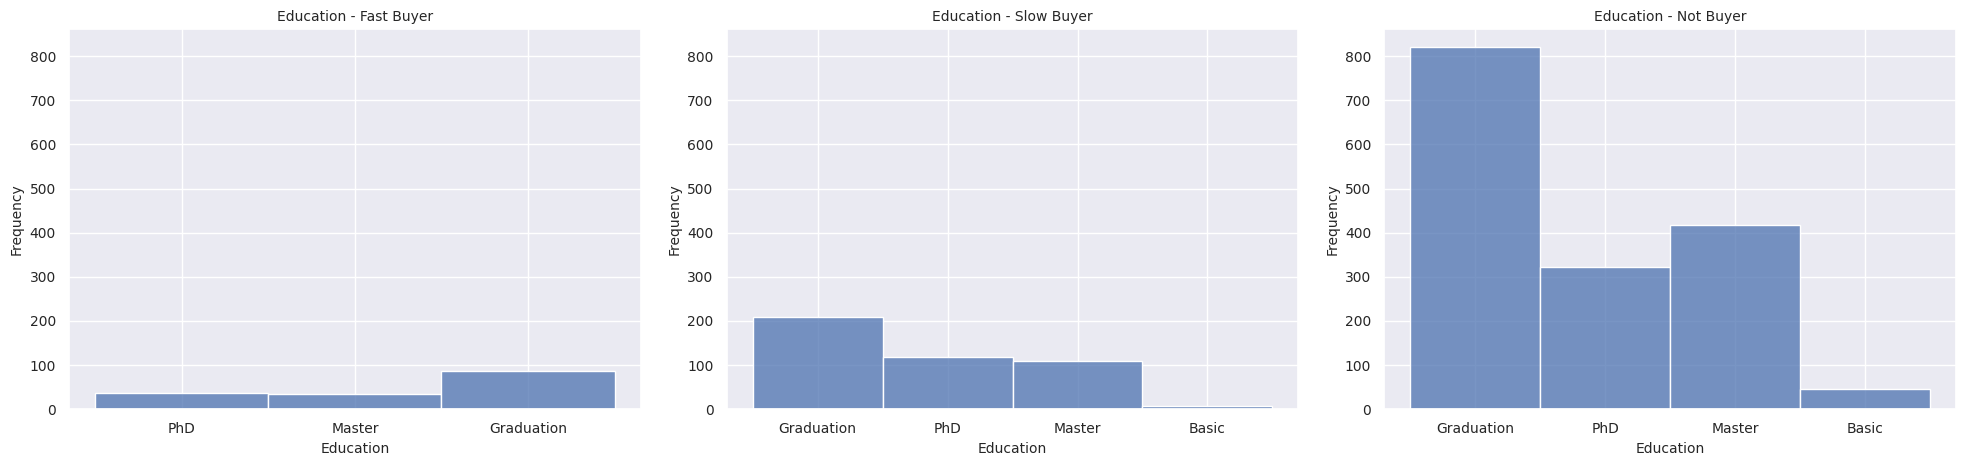

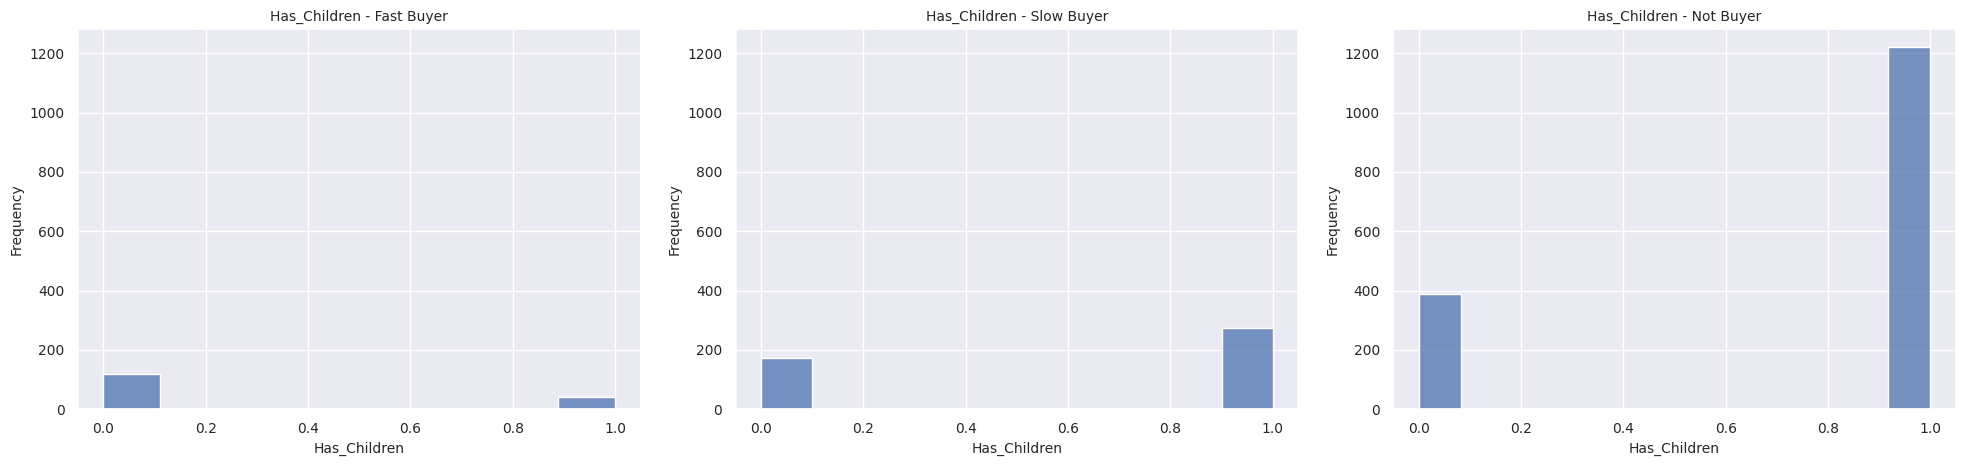

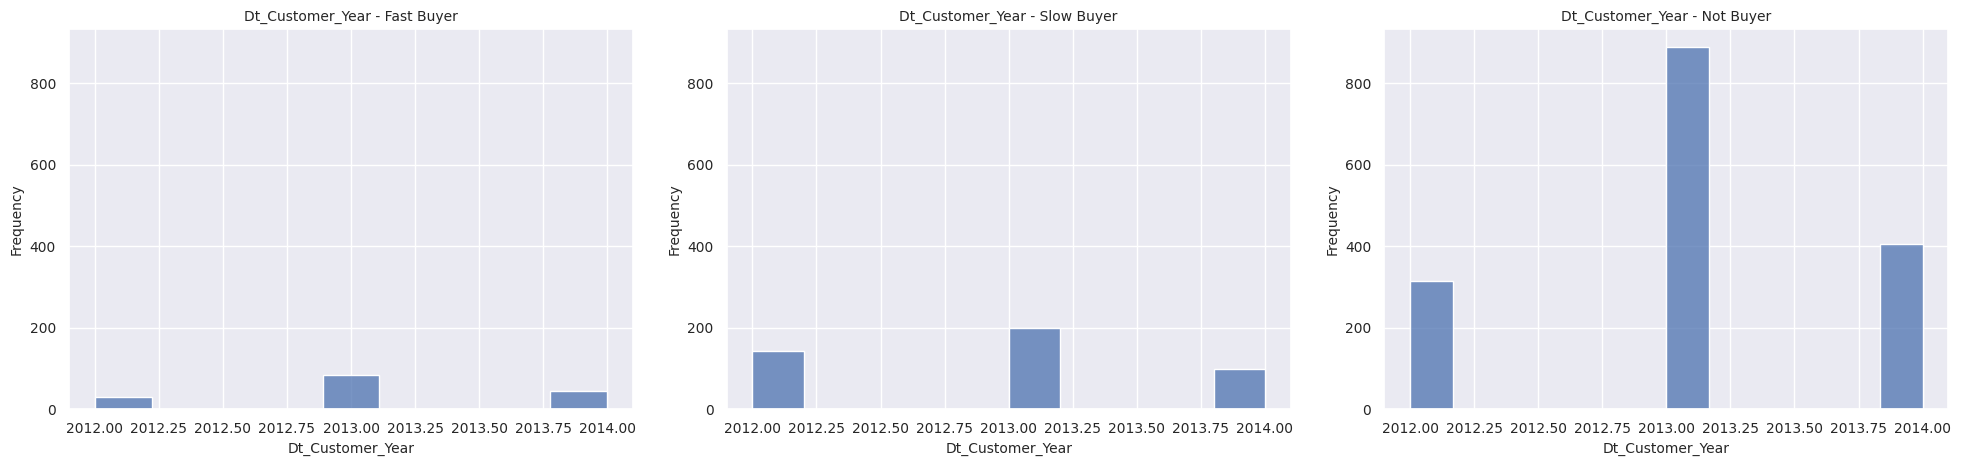

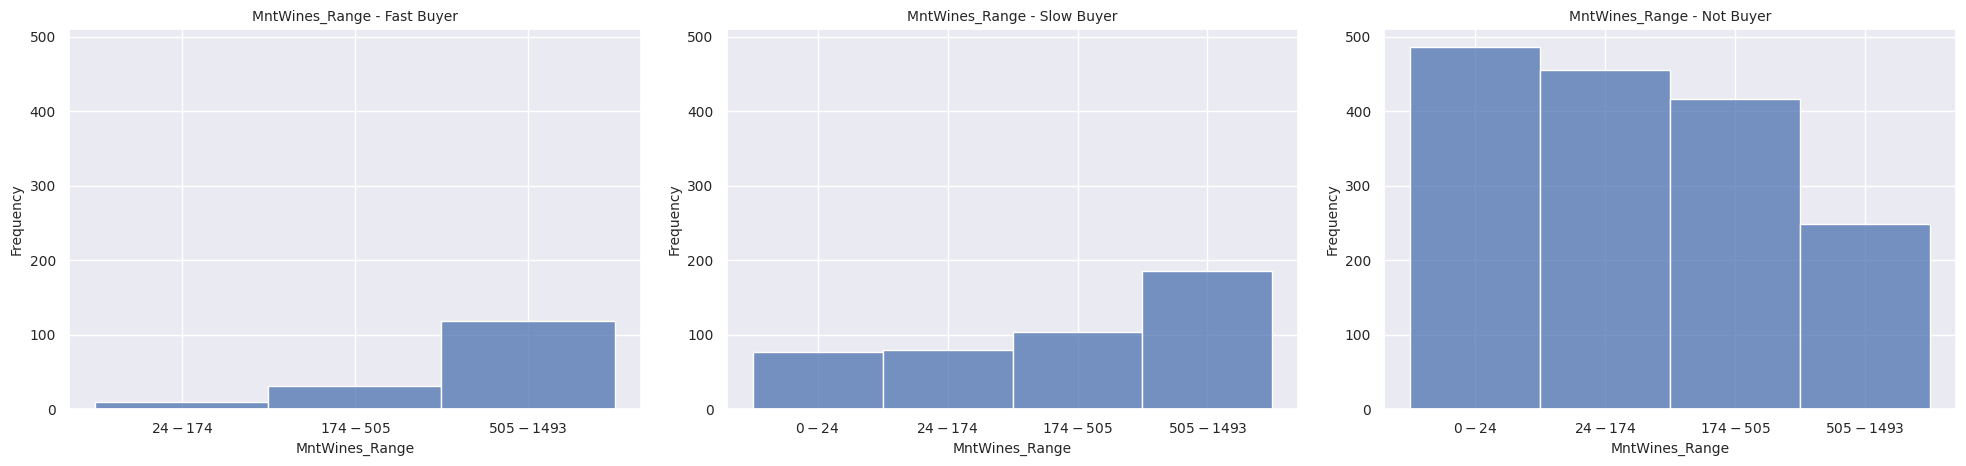

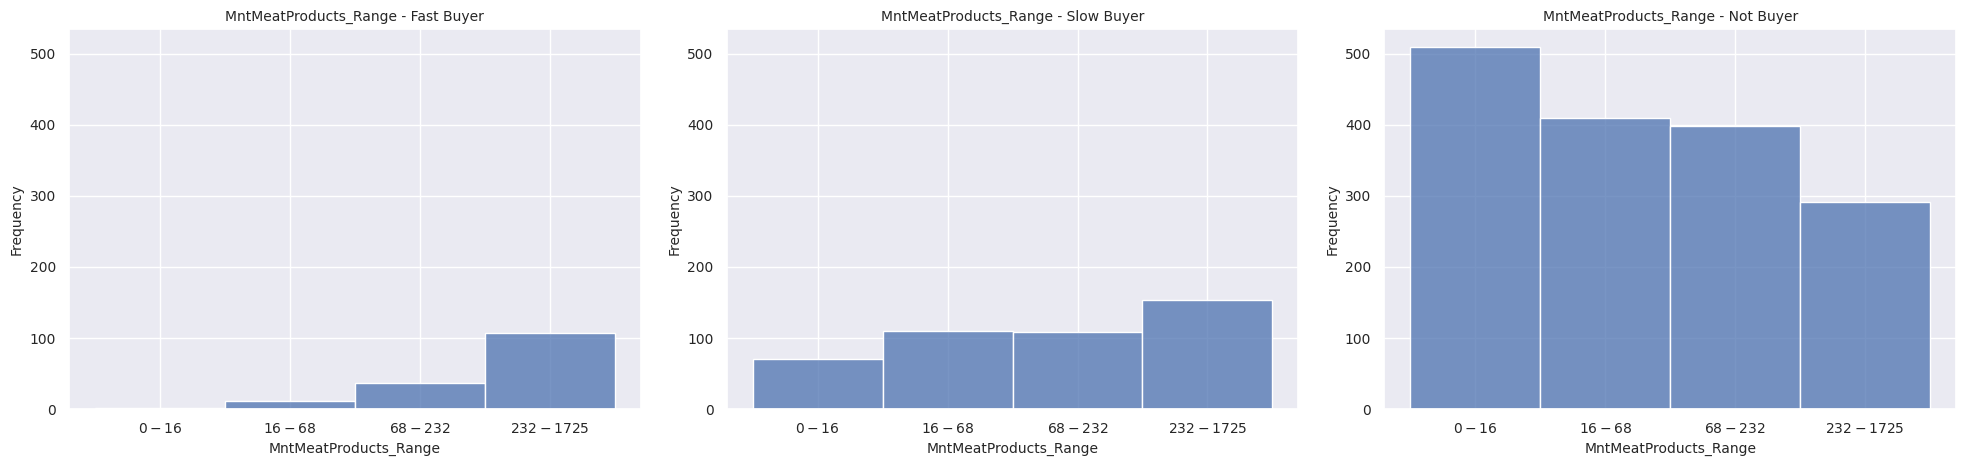

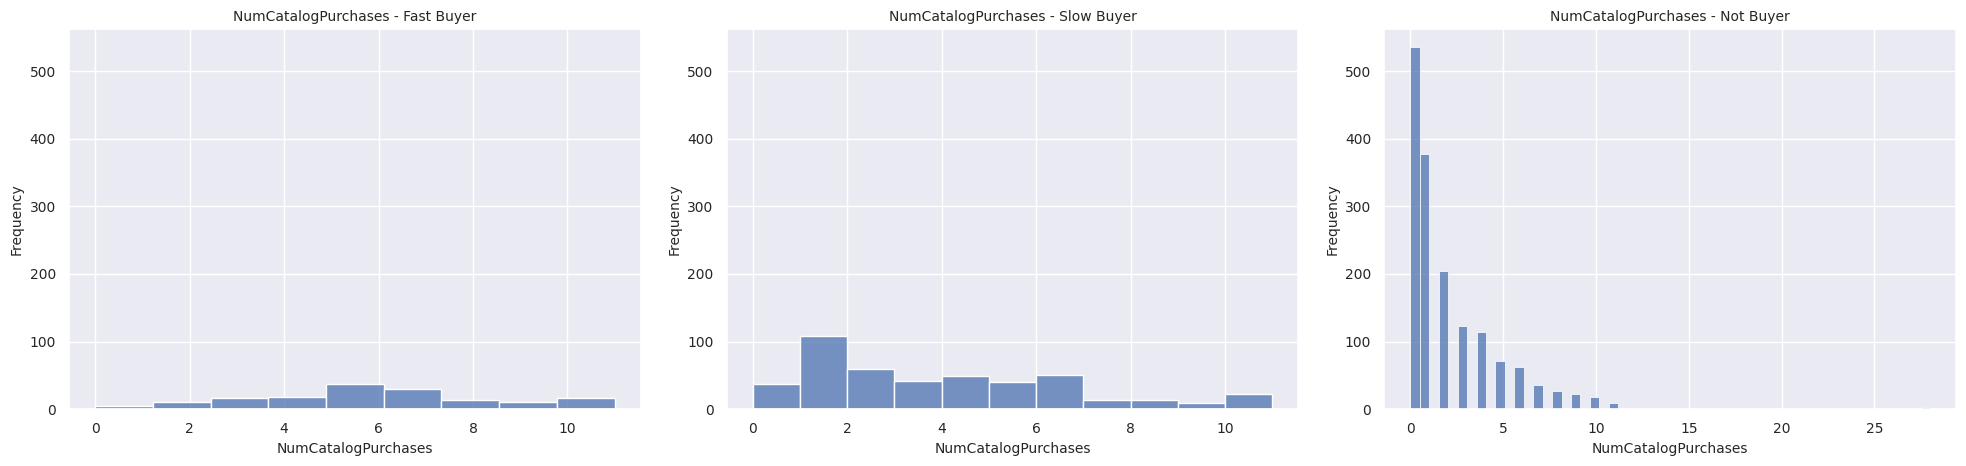

In [ ]:
# Now we will create histograms to check the distribution of the variables.
# We will create histograms for each selected variable.
# We will a graph of the varible for Fast_Buyers on the left, for Slow_Buyers in the middle, and No_Buyers on the right so we can easily compare data patterns.

# To make things more legible, I will set the scale of the graph labels.
sns.set(font_scale=1.5, rc={'axes.labelsize': 10, 'axes.titlesize': 10, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

# I will create a figure with subplots for Income_Range for each buyer category.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
sns.histplot(df_analysis[df_analysis['Fast_Buyer'] == 1]['Income_Range'], ax=axes[0])
axes[0].set_title('Income Range - Fast Buyer')
sns.histplot(df_analysis[df_analysis['Slow_Buyer'] == 1]['Income_Range'], ax=axes[1])
axes[1].set_title('Income Range - Slow Buyer')
sns.histplot(df_analysis[df_analysis['Not_Buyer'] == 1]['Income_Range'], ax=axes[2])
axes[2].set_title('Income Range - Not Buyer')

  # I was getting this problem where I would look at the data and the scale of the graphs would be affected by the maximum value present in the graph. That maximum value could differ betwween Fast, Slow and No Buyers.
  # So I set consistent y-axis limits in order to see Fast_Buyers, Slow_Buyers and No_Buyers at the same scale and compare then at first glance.

max_value = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1], axes[2].get_ylim()[1])
for ax in axes:
  ax.set_ylim(0, max_value)

plt.tight_layout()
plt.show()


# The same for Year_Birth_Range now.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
sns.histplot(df_updated[df_updated['Fast_Buyer'] == 1]['Year_Birth_Range'], ax=axes[0])
axes[0].set_title('Year of Birth Range - Fast Buyer')
sns.histplot(df_updated[df_updated['Slow_Buyer'] == 1]['Year_Birth_Range'], ax=axes[1])
axes[1].set_title('Year of Birth Range - Slow Buyer')
sns.histplot(df_updated[df_updated['Not_Buyer'] == 1]['Year_Birth_Range'], ax=axes[2])
axes[2].set_title('Year of Birth Range - Not Buyer')

max_value = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1], axes[2].get_ylim()[1])
for ax in axes:
  ax.set_ylim(0, max_value)

plt.tight_layout()
plt.show()


# Since keeping on doing this process would take too long, I will create a list of the variables remaning and iterate through it.
variables = ['Marital_Status', 'Education', 'Has_Children',
             'Dt_Customer_Year', 'MntWines_Range', 'MntMeatProducts_Range', 'NumCatalogPurchases']

# Let's iterate over the variables and create the remaining plots.
for var in variables:

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

  sns.histplot(df_updated[df_updated['Fast_Buyer'] == 1][var], ax=axes[0])
  axes[0].set_title(f'{var} - Fast Buyer')
  axes[0].set_xlabel(var)
  axes[0].set_ylabel('Frequency')

  sns.histplot(df_updated[df_updated['Slow_Buyer'] == 1][var], ax=axes[1])
  axes[1].set_title(f'{var} - Slow Buyer')
  axes[1].set_xlabel(var)
  axes[1].set_ylabel('Frequency')

  sns.histplot(df_updated[df_updated['Not_Buyer'] == 1][var], ax=axes[2])
  axes[2].set_title(f'{var} - Not Buyer')
  axes[2].set_xlabel(var)
  axes[2].set_ylabel('Frequency')

  max_value = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1], axes[2].get_ylim()[1])
  for ax in axes:
    ax.set_ylim(0, max_value)

  plt.tight_layout()
  plt.show()


In [ ]:
# To make the patterns even easier to identify, I will also list the mode of each variable for all of the Buyers types.

variables = ['Income_Range', 'Year_Birth_Range', 'Marital_Status', 'Education', 'Has_Children',
             'Dt_Customer_Year', 'MntWines_Range', 'MntMeatProducts_Range', 'NumCatalogPurchases']

for buyer_type in ['Fast_Buyer', 'Slow_Buyer', 'Not_Buyer']:
  print(f"\nModes for {buyer_type} variables:")
  for var in variables:
    buyers = df_updated[df_updated[buyer_type] == 1]
    mode = buyers[var].mode()[0]
    print(f"  {var}: {mode}")


Modes for Fast_Buyer variables:
  Income_Range: $68487 - $666666
  Year_Birth_Range: 1960-1979
  Marital_Status: Married
  Education: Graduation
  Has_Children: 0
  Dt_Customer_Year: 2013
  MntWines_Range: $505 - $1493
  MntMeatProducts_Range: $232 - $1725
  NumCatalogPurchases: 7

Modes for Slow_Buyer variables:
  Income_Range: $68487 - $666666
  Year_Birth_Range: 1960-1979
  Marital_Status: Married
  Education: Graduation
  Has_Children: 1
  Dt_Customer_Year: 2013
  MntWines_Range: $505 - $1493
  MntMeatProducts_Range: $232 - $1725
  NumCatalogPurchases: 1

Modes for Not_Buyer variables:
  Income_Range: $1729.0 - $35196
  Year_Birth_Range: 1960-1979
  Marital_Status: Married
  Education: Graduation
  Has_Children: 1
  Dt_Customer_Year: 2013
  MntWines_Range: $0 - $24
  MntMeatProducts_Range: $0 - $16
  NumCatalogPurchases: 0


In [ ]:
# As we can see, Fast Buyers are different from the other categories, as they tend to have no children.

# There's is a clear difference between Fast and Slow Buyers when it comes to Number of Catalog Purchases. Other differences between Fast Buyers and Slow buyers are sutle and we have to reference the graphs to find them.
# When we do so, we can see that Fast Buyers have higher income, have lower prevalence of single people and more prevalence of 0 children.

# What differ Not_Buyers from buyers (both fast and slow ones) are income, and their tendency to be low spenders on Wine and Meat Products.

**CONCLUSION**

We started this work with the hypotheys that a customer would be highly suscetible to marketing campaigns if he/she (a) spends a lot in itens, (b) has lower recency, (c) lower education levels, and (d) has children.

We found that item spending and having children indeed impact customer propensity to buy in marketing campaigns. The effect of their education and recency was less relevant.

We were trying to answer the question "For the given context, what is the profile of customers that are easily converted through market campaigns, which ones are harder to convince and which ones are not reachable at all?". Now we can answer that:

**(1)** easily converted customer are the ones that buy a lot through catalogs, have high income, spend huge sums on wine and meat, are single and have no children;

**(2)** customers that are harder to convince are the ones who have a relevant level of income, but do not usually buy through catalogs;

**(3)** customer that are not reachable are the ones that usually do not buy through catalogs, have very low income and do not spend much on wines and meats.